In [1]:
"""
# Practical assignment

Build a text classifier which detect spam emails.

- Dataset to be used: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data
- Tasks:
    1. Perform EDA on the text data:
        - Find the 10 most frequent words for each class (remove stopwords first)
        - Find the 10 most frequent bi-rgams each class  (remove stopwords first)
        - Find the 10 most frequent tri-rgams each class  (remove stopwords first)
        - Create wordcloud each class (remove stopwords first)
    2. Convert the text to vectors using `Bag-of-words` model.
    3. Apply any `machine learning model` and record the `F1-score`.
    4. Repeat [1] and [2] with Tf-IDF vectors.
    5. Add `text preprocessing` steps and repeat [2] with Tf-IDF vectors. Preprocessing steps to be used:
    - tokenize the text
    - convert to lower case
    - remove stop words
    - remove email-ids, urls and html tags if any
    - remove numbers
    - remove punctuation marks
    - apply Lemmatization to each token
6. List out the scores of each model at the end of the notebook.
(There should be scores of 3 methods - BoW, Tf-IDF, Tf-IDF with text preprocessing.
Make sure to use the same model for all experiments)."""

'\n# Practical assignment\n\nBuild a text classifier which detect spam emails.\n\n- Dataset to be used: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data\n- Tasks:\n    1. Perform EDA on the text data:\n        - Find the 10 most frequent words for each class (remove stopwords first)\n        - Find the 10 most frequent bi-rgams each class  (remove stopwords first)\n        - Find the 10 most frequent tri-rgams each class  (remove stopwords first)\n        - Create wordcloud each class (remove stopwords first)\n    2. Convert the text to vectors using `Bag-of-words` model.\n    3. Apply any `machine learning model` and record the `F1-score`.\n    4. Repeat [1] and [2] with Tf-IDF vectors.\n    5. Add `text preprocessing` steps and repeat [2] with Tf-IDF vectors. Preprocessing steps to be used:\n    - tokenize the text\n    - convert to lower case\n    - remove stop words\n    - remove email-ids, urls and html tags if any\n    - remove numbers\n    - remove punctuat

In [2]:
pip install pandas matplotlib wordcloud nltk

In [4]:
#task1

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from nltk.util import ngrams
import nltk

nltk.download('punkt')
file_path = '/content/drive/MyDrive/SNLP/spam.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
print("Column names:", df.columns)
print(df.head())

Column names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
df = df[['v1', 'v2']].rename(columns={'v1': 'class', 'v2': 'text'})

In [7]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Function to preprocess text: lowercase, remove stopwords
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in ENGLISH_STOP_WORDS]
    return filtered_tokens
df['processed_text'] = df['text'].apply(preprocess_text)

In [9]:
# Function to get most frequent n-grams
def get_frequent_ngrams(texts, n=1, top_k=10):
    all_ngrams = []
    for tokens in texts:
        all_ngrams.extend(ngrams(tokens, n))
    counter = Counter(all_ngrams)
    most_common = counter.most_common(top_k)
    return [' '.join(gram) for gram, _ in most_common]

In [10]:
classes = df['class'].unique()

# For each class, finding the 10 most frequent words, bigrams, and trigrams
for cls in classes:
    class_texts = df[df['class'] == cls]['processed_text']

    print(f"Class: {cls}")
    print("Top 10 words:", get_frequent_ngrams(class_texts, n=1))
    print("Top 10 bigrams:", get_frequent_ngrams(class_texts, n=2))
    print("Top 10 trigrams:", get_frequent_ngrams(class_texts, n=3))
    print()

Class: ham
Top 10 words: ['u', 'gt', 'lt', '2', 'just', 'ok', 'got', 'ur', 'know', 'like']
Top 10 bigrams: ['lt gt', 'gon na', 'let know', 'sorry later', 'r u', 'u r', 'good morning', 'wan 2', 'u wan', 'wan na']
Top 10 trigrams: ['lt decimal gt', 'u wan 2', 'gt lt gt', 'happy new year', 'lt gt lt', 'like lt gt', 'pls send message', 'pick phone right', 'phone right pls', 'right pls send']

Class: spam
Top 10 words: ['free', '2', 'txt', 'ur', 'u', 'mobile', 'text', '4', 'stop', 'claim']
Top 10 bigrams: ['t c', 't cs', 'po box', 'prize guaranteed', 'send stop', 'await collection', 'won prize', 'urgent mobile', 'land line', 'customer service']
Top 10 trigrams: ['draw shows won', 'won prize guaranteed', 'land line claim', 'shows won prize', 'private 2003 account', '2003 account statement', 'shows 800 points', 'free entry 2', 'bonus caller prize', 'urgent trying contact']



In [11]:
def create_wordcloud(texts, title):
    all_words = [word for tokens in texts for word in tokens]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

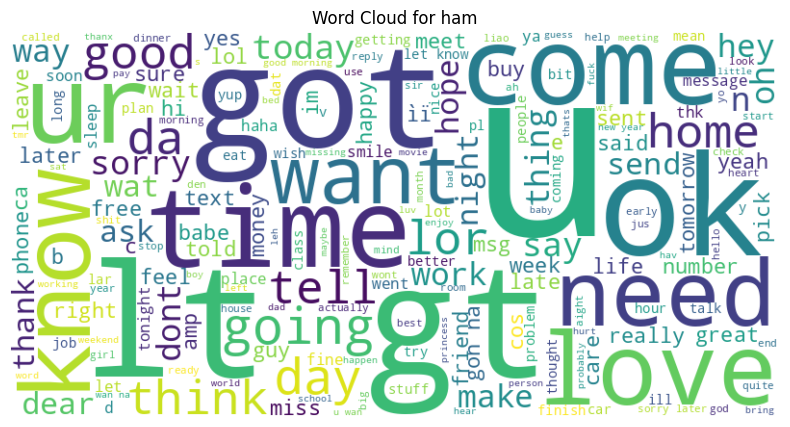

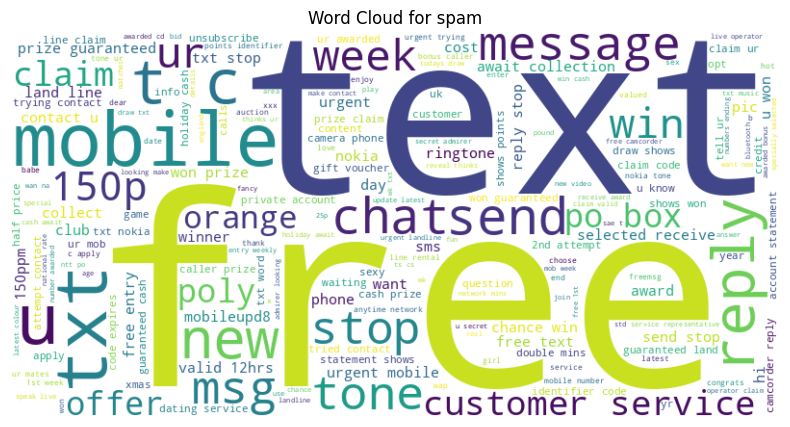

In [12]:
for cls in classes:
    class_texts = df[df['class'] == cls]['processed_text']
    create_wordcloud(class_texts, f"Word Cloud for {cls}")

In [13]:
#task2
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.head())

   00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0   0    0       0             0     0     0            0            0   
1   0    0       0             0     0     0            0            0   
2   0    0       0             0     0     0            0            0   
3   0    0       0             0     0     0            0            0   
4   0    0       0             0     0     0            0            0   

   0125698789  02  ...  ó_  û_  û_thanks  ûªm  ûªt  ûªve  ûï  ûïharry  ûò  \
0           0   0  ...   0   0         0    0    0     0   0        0   0   
1           0   0  ...   0   0         0    0    0     0   0        0   0   
2           0   0  ...   0   0         0    0    0     0   0        0   0   
3           0   0  ...   0   0         0    0    0     0   0        0   0   
4           0   0  ...   0   0         0    0    0     0   0        0   0   

   ûówell  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 8404 colu

In [15]:
#task3
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [16]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'spam' else 0)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

F1-score: 0.9090909090909091
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
#task4
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  ...   ó_   û_  û_thanks  ûªm  ûªt  ûªve   ûï  ûïharry  \
0         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
1         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
2         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
3         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
4         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   

    ûò  ûówell  
0  0.0     0.0  
1  0.0     0.0  
2  0.0     0.0  
3  0.0     0.0  
4

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

file_path = '/content/drive/MyDrive/SNLP/spam.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'class', 'v2': 'text'})
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
df['class'] = df['class'].apply(lambda x: 1 if x == 'spam' else 0)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

F1-score: 0.7935222672064777
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [21]:
#task5
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [22]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
file_path = '/content/drive/MyDrive/SNLP/spam.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [24]:
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [25]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    # Remove email-ids, urls, and html tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [26]:
data['processed_text'] = data['text'].apply(preprocess_text)

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
print(X.shape)

print(data[['label', 'processed_text']].head())
print(X[:5].toarray())

(5572, 7881)
  label                                     processed_text
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry wkly comp win fa cup final tkts st ...
3   ham                u dun say early hor u c already say
4   ham           nah dont think go usf life around though
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0) #binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")


F1-score: 0.7729083665338646


-----

**RESULTS**

1. **Bag of Words (BoW) without text preprocessing**
   - F1-score: **0.9090909090909091**
   - Interpretation: Highest performance, indicating that word frequency alone is a strong indicator for spam detection.

2. **TF-IDF without text preprocessing**
   - F1-score: **0.7935222672064777**
   - Interpretation: Decent performance but lower than BoW, suggesting that word importance across documents is less effective for this dataset.

3. **TF-IDF with text preprocessing**
   - F1-score: **0.7729083665338646**
   - Interpretation: Lowest performance, indicating that preprocessing steps did not enhance and might have reduced the model's effectiveness in this context.
